In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import argparse
import helpers
import os
from matplotlib import pyplot as plt

import numpy as np
import networkx as nx
from sklearn.metrics import log_loss
from decentralized_SGD_logistic import DecentralizedSGDLogistic
from sklearn.linear_model import SGDClassifier

## Load Higgs Boson Dataset

In [3]:
y, A = helpers.load_data()

## Compute the baseline with SGD classifier 

In [4]:
# Fit a SGD
clf = SGDClassifier(loss='log', penalty='l2', alpha =1/A.shape[0], tol=1e-4, n_jobs=1, random_state=2)
clf.fit(A, y)

accuracy = clf.score(A, y)
optimum_x = clf.predict_proba(A)[:, 1]

# Optimal loss, useful for plots
optimum_loss = (-(y.T.dot(np.log(optimum_x)) + (1 - y).T.dot(np.log(1 - optimum_x))) / A.shape[0])

print('Accuracy:', accuracy)
print('Final loss:', optimum_loss)

Accuracy: 0.747132
Final loss: 0.5057994169435835


## Computing with Decentralized SGD with basic topologies (disconnected, torus, complete, ring, star)

In [5]:
reg = 1 / A.shape[0]
n_features = A.shape[1]
n_machines = [900, 2500,6400]
compute_loss_every = 5
params = dict(num_epoch=5, lr_type='bottou',
                           initial_lr=0.2, regularizer=reg,
                           quantization_method='full', n_machines=0,
                           communication_method='plain',topology='',
                           data_distribution_random_seed=2, random_seed=2,
                           data_distribution_strategy='naive', tol=1e-10, compute_loss_every=compute_loss_every)

In [6]:
losses_disconnected = []
params_disconnected = params.copy()
params_disconnected["topology"] = "disconnected"

for n in n_machines:
    params_disconnected['n_machines'] = n
    losses_disconnected.append(helpers.run_logistic_n_times(A, y, params_disconnected, 3))

Decentralized optimization, run number 1 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      17s       0.6634    0.7249        
[2/5]      [277/277]      34s       0.6696    0.7298        
[3/5]      [277/277]      50s       0.6698    0.7306        
[4/5]      [277/277]      67s       0.6781    0.7324        
[5/5]      [277/277]      82s       0.6862    0.7328        

Final score: 0.7328
Decentralized optimization, run number 2 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      16s       0.6592    0.7249        
[2/5]      [277/277]      32s       0.6662    0.7293        
[3/5]      [277/277]      47s       0.6735    0.7307        
[4/5]      [277/277]      65s       0.6762    0.7318        
[5/5]      [277/277]      78s       0.6807    0.7321        

Final score: 0.7321
Decentralized optimization, run number 3 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      15s       

In [9]:
losses_torus = [] 
params_torus = params.copy()
params_torus['topology'] = 'torus'

for n in n_machines:
    params_torus['n_machines'] = n
    losses_torus.append(helpers.run_logistic_n_times(A, y, params_torus, 3))

Decentralized optimization, run number 1 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      10s       0.5679    0.7259        
[2/5]      [277/277]      20s       0.5645    0.7272        
[3/5]      [277/277]      30s       0.5639    0.7265        
[4/5]      [277/277]      40s       0.5638    0.7280        
[5/5]      [277/277]      46s       0.5641    0.7280        

Final score: 0.7280
Decentralized optimization, run number 2 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      6s        0.5671    0.7246        
[2/5]      [277/277]      13s       0.5651    0.7280        
[3/5]      [277/277]      19s       0.5642    0.7277        
[4/5]      [277/277]      25s       0.5646    0.7280        
[5/5]      [277/277]      31s       0.5646    0.7283        

Final score: 0.7283
Decentralized optimization, run number 3 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      6s        

In [10]:
losses_complete = [] 
params_complete = params.copy()
params_complete['topology'] = 'complete'

for n in n_machines:
    params_complete['n_machines'] = n
    losses_complete.append(helpers.run_logistic_n_times(A, y, params_complete, 3))

Decentralized optimization, run number 1 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      7s        0.5670    0.7253        
[2/5]      [277/277]      14s       0.5636    0.7261        
[3/5]      [277/277]      20s       0.5633    0.7262        
[4/5]      [277/277]      27s       0.5631    0.7275        
[5/5]      [277/277]      34s       0.5633    0.7277        

Final score: 0.7277
Decentralized optimization, run number 2 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      7s        0.5666    0.7241        
[2/5]      [277/277]      14s       0.5641    0.7270        
[3/5]      [277/277]      20s       0.5633    0.7266        
[4/5]      [277/277]      27s       0.5637    0.7272        
[5/5]      [277/277]      34s       0.5635    0.7276        

Final score: 0.7276
Decentralized optimization, run number 3 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      10s       

In [11]:
losses_ring = [] 
params_ring = params.copy()
params_ring['topology'] = 'ring'

for n in n_machines:
    params_ring['n_machines'] = n
    losses_ring.append(helpers.run_logistic_n_times(A, y, params_ring, 3))

Decentralized optimization, run number 1 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      7s        0.5706    0.7268        
[2/5]      [277/277]      14s       0.5671    0.7283        
[3/5]      [277/277]      21s       0.5665    0.7274        
[4/5]      [277/277]      28s       0.5664    0.7293        
[5/5]      [277/277]      35s       0.5672    0.7292        

Final score: 0.7292
Decentralized optimization, run number 2 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      7s        0.5693    0.7255        
[2/5]      [277/277]      14s       0.5678    0.7287        
[3/5]      [277/277]      21s       0.5664    0.7284        
[4/5]      [277/277]      30s       0.5670    0.7286        
[5/5]      [277/277]      36s       0.5678    0.7295        

Final score: 0.7295
Decentralized optimization, run number 3 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      7s        

In [12]:
losses_star = [] 
params_star = params.copy()
params_star['topology'] = 'star'

for n in n_machines:
    params_star['n_machines'] = n
    losses_star.append(helpers.run_logistic_n_times(A, y, params_star, 3))

Decentralized optimization, run number 1 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      7s        0.5927    0.7239        
[2/5]      [277/277]      14s       0.5882    0.7258        
[3/5]      [277/277]      20s       0.5886    0.7259        
[4/5]      [277/277]      27s       0.5896    0.7277        
[5/5]      [277/277]      34s       0.5910    0.7279        

Final score: 0.7279
Decentralized optimization, run number 2 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      7s        0.5897    0.7231        
[2/5]      [277/277]      13s       0.5897    0.7268        
[3/5]      [277/277]      20s       0.5900    0.7270        
[4/5]      [277/277]      27s       0.5922    0.7278        
[5/5]      [277/277]      34s       0.5909    0.7276        

Final score: 0.7276
Decentralized optimization, run number 3 

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      7s        

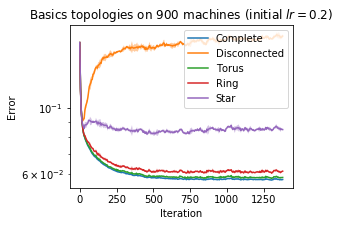

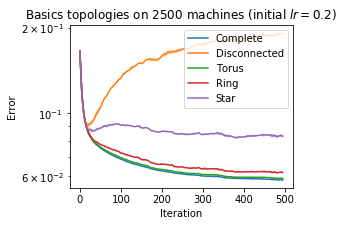

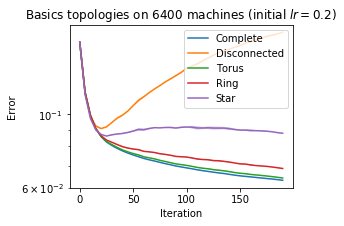

In [29]:
for i in range(len(n_machines)):
    iterations_indices = np.arange(0, losses_complete[i][0].shape[0] * compute_loss_every, 
                                   compute_loss_every)    
    helpers.plot_losses_with_std([losses_complete[i], 
                                 losses_disconnected[i], 
                                 losses_torus[i], 
                                 losses_ring[i], 
                                 losses_star[i]],
            iterations_indices, optimum_loss=optimum_loss, 
            labels=["Complete","Disconnected", "Torus", "Ring", "Star"],figsize=(4,3), title="Basics topologies on {0} machines (initial $lr=0.2$)".format(n_machines[i]), save_as_pdf=True, pdf_name="Basics topologies on {0} machines".format(n_machines[i]))